In [2]:
%matplotlib inline
import matplotlib.pyplot as plt
from sklearn.datasets.samples_generator import make_blobs

/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:144: FutureWarning: The sklearn.datasets.samples_generator module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.datasets. Anything that cannot be imported from sklearn.datasets is now part of the private API.
  warnings.warn(message, FutureWarning)


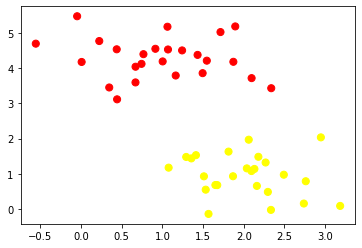

In [3]:
X,y = make_blobs(n_samples=50, centers = 2, random_state=0, cluster_std=0.60)
plt.scatter(X[:,0],X[:,1], c=y, s=50, cmap='autumn')

In [11]:
from sklearn.svm import SVC #Support Vector Classify
import numpy as np

model = SVC(kernel='linear', C=1E10)
model.fit(X,y)

SVC(C=10000000000.0, break_ties=False, cache_size=200, class_weight=None,
    coef0=0.0, decision_function_shape='ovr', degree=3, gamma='scale',
    kernel='linear', max_iter=-1, probability=False, random_state=None,
    shrinking=True, tol=0.001, verbose=False)

In [13]:
# Function to help SVM visualizatin
def plot_svc_decision_function(model, ax=None, plot_support=True):
  """Plot the decision function for a 2D SVC"""
  if ax is None:
    ax = plt.gca()
  xlim = ax.get_xlim()
  ylim = ax.get_ylim()

  #create grid do evaluate model
  x = np.linspace(xlim[0], xlim[1],30)
  y = np.linspace(ylim[0], ylim[1],30)
  Y,X = np. meshgrid(y,x)
  xy = np.vstack([X.ravel(),Y.ravel()]).T
  P = model.decision_function(xy).reshape(X.shape)

  #plot decision boundary and margins
  ax.contour(X,Y,P,colors = 'k',
             levels = [-1,0,1], alpha = 0.5,
             linestyles = ['--','-','--'])
  
  #plot support vectors
  if plot_support:
    ax.scatter(model.support_vectors_[:,0],
               model.support_vectors_[:,1],
               s=300, linewidth=1, facecolors='none')
  ax.set_xlim(xlim)
  ax.set_ylim(ylim)

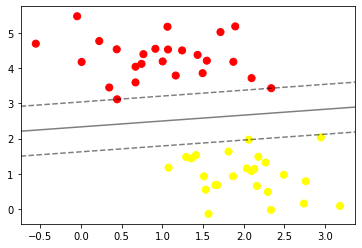

In [14]:
plt.scatter(X[:,0], X[:,1], c=y, s=50, cmap='autumn')
plot_svc_decision_function(model);

In [15]:
model.support_vectors_

array([[0.44359863, 3.11530945],
       [2.33812285, 3.43116792],
       [2.06156753, 1.96918596]])

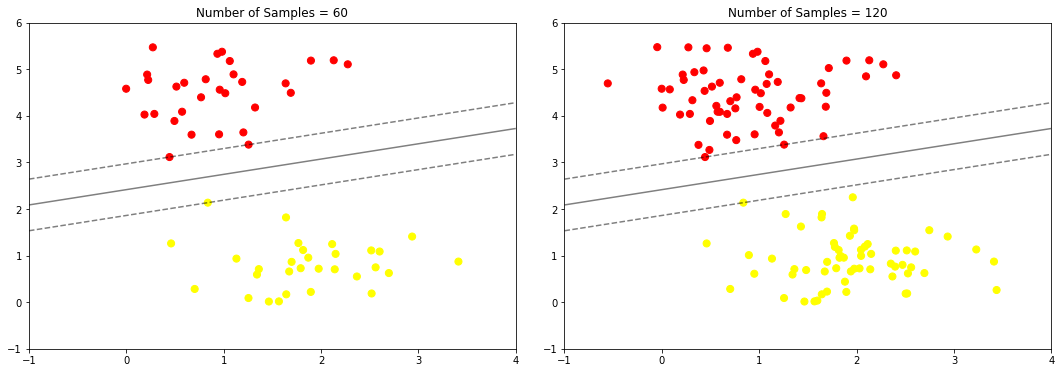

In [20]:
def train_and_plot_svm(N=10, ax=None):
  X,y = make_blobs(n_samples=200, centers=2,
                   random_state=0, cluster_std=0.60)
  X=X[:N]
  y=y[:N]
  model = SVC(kernel='linear', C=1E10)
  model.fit(X,y)
  ax = ax or plt.gca()
  ax.scatter(X[:,0], X[:,1], c=y, s=50, cmap = 'autumn')
  ax.set_xlim(-1,4)
  ax.set_ylim(-1,6)
  plot_svc_decision_function(model, ax)

fig, ax = plt.subplots(1,2, figsize=(16,6))
fig.subplots_adjust(left = 0.0625, right = 0.95, wspace=0.1)
for axi, N in zip(ax,[60,120]):
  train_and_plot_svm(N, axi)
  axi.set_title('Number of Samples = {0}'.format(N))
